In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plot
dataset = pickle.load(open('../data/UrbanSound8K_test.pkl', 'rb'))

def draw(top, chroma, spec_contrast, tonnetz):
    fg, (ax1, ax2, ax3, ax4) = plot.subplots(nrows=4, gridspec_kw={'height_ratios': [60, 12, 7,6]})
    fg.set_figwidth(5.125)
    fg.set_figheight(10.625)
    fg.tight_layout()
    ax1.imshow(top, origin='lower')
    ax1.axis('off')
    ax2.imshow(chroma, origin='lower')
    ax2.axis('off')
    ax3.imshow(spec_contrast, origin='lower')
    ax3.axis('off')
    ax4.imshow(tonnetz, origin='lower')
    ax4.axis('off')
    plot.show()

In [3]:
def plot_lmc_mc(index):
    filename = dataset[index]['filename']
    samples = [segment['features'] for segment in dataset if segment['filename'] == filename]
    
    sample1 = dataset[index]['features']
    logmelspec = sample1['logmelspec']
    mfcc = sample1['mfcc']
    chroma = sample1['chroma']
    spec_contrast = sample1['spectral_contrast']
    tonnetz = sample1['tonnetz']

    draw(logmelspec, chroma, spec_contrast, tonnetz)
    draw(mfcc, chroma, spec_contrast, tonnetz)

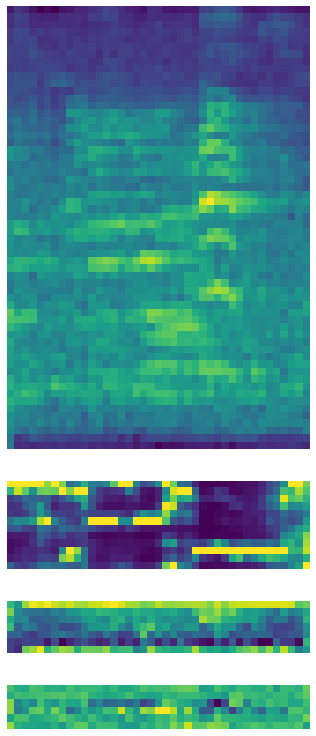

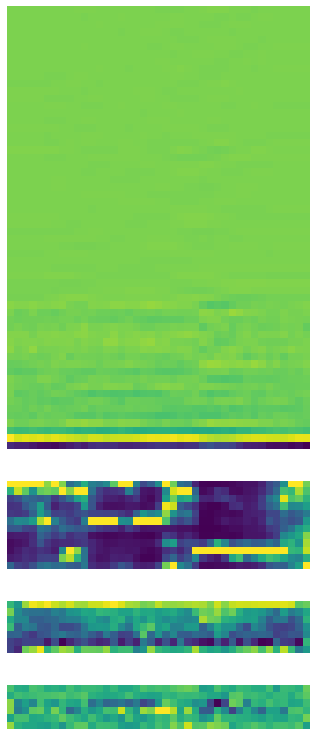

In [4]:
plot_lmc_mc(82)